ЗАДАЧА 1

In [28]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import re

class Account:
    _account_counter = 1000  # приватный счётчик всех аккаунтов

    # --- Конструктор ---
    def __init__(self, account_holder: str, balance: float = 0):
        self._validate_holder_name(account_holder)
        if balance < 0:
            raise ValueError("Начальный баланс не может быть отрицательным.")

        self.holder = account_holder.strip().title()
        self.account_number = f"ACC-{Account._account_counter}"
        Account._account_counter += 1

        self._balance = balance
        self.operations_history = []

    # --- Проверка имени владельца ---
    def _validate_holder_name(self, name):
        """Имя должно быть в формате 'Имя Фамилия', кириллица или латиница, с заглавных."""
        pattern = r"^[A-ZА-ЯЁ][a-zа-яё]+ [A-ZА-ЯЁ][a-zа-яё]+$"
        if not re.match(pattern, name.strip()):
            raise ValueError("Имя владельца должно быть в формате 'Имя Фамилия'.")

    # --- Геттер для баланса ---
    def get_balance(self):
        return self._balance

    # --- Метод пополнения ---
    def deposit(self, amount: float):
        if amount <= 0:
            self._add_operation("deposit", amount, "fail")
            raise ValueError("Сумма депозита должна быть положительной.")

        self._balance += amount
        self._add_operation("deposit", amount, "success")

    # --- Метод снятия средств ---
    def withdraw(self, amount: float):
        if amount <= 0:
            self._add_operation("withdraw", amount, "fail")
            raise ValueError("Сумма снятия должна быть положительной.")

        if amount > self._balance:
            self._add_operation("withdraw", amount, "fail")
            raise ValueError("Недостаточно средств на счёте.")

        self._balance -= amount
        self._add_operation("withdraw", amount, "success")

    # --- Приватный метод записи операции ---
    def _add_operation(self, operation_type, amount, status):
        operation = {
            "datetime": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
            "type": operation_type,
            "amount": amount,
            "balance": self._balance,
            "status": status
        }
        self.operations_history.append(operation)

    # --- История операций ---
    def get_history(self, readable: bool = True):
        if not readable:
            return self.operations_history
        formatted = []
        for op in self.operations_history:
            line = (f"[{op['datetime']}] {op['type'].capitalize()} на {op['amount']}₽ "
                    f"→ баланс: {op['balance']}₽ ({op['status']})")
            formatted.append(line)
        return "\n".join(formatted)

    # --- Визуализация истории ---
    def plot_history(self, show: bool = True, save_path: str = None):
        if not self.operations_history:
            raise RuntimeError("История операций пустая — нечего строить.")

        df = pd.DataFrame(self.operations_history)
        df = df.sort_values("datetime")
        df["datetime"] = pd.to_datetime(df["datetime"])

        plt.figure(figsize=(10, 5))
        plt.plot(df["datetime"], df["balance"], marker="o")
        plt.title(f"История баланса — {self.holder} ({self.account_number})")
        plt.xlabel("Время операции")
        plt.ylabel("Баланс")
        plt.grid(True)
        plt.tight_layout()

        if save_path:
            plt.savefig(save_path)
        if show:
            plt.show()
        plt.close()


# --- Тестируем ---
if __name__ == "__main__":
    acc = Account("Мария Трёхрукая", 1000)
    acc.deposit(500)
    try:
        acc.withdraw(2000)
    except ValueError as e:
        print("Ошибка:", e)
    acc.withdraw(400)
    print("\nИстория операций:")
    print(acc.get_history())


Ошибка: Недостаточно средств на счёте.

История операций:
[2025-11-08 10:05:55] Deposit на 500₽ → баланс: 1500₽ (success)
[2025-11-08 10:05:55] Withdraw на 2000₽ → баланс: 1500₽ (fail)
[2025-11-08 10:05:55] Withdraw на 400₽ → баланс: 1100₽ (success)


In [ ]:
# --- Проверка работы валидации (Также, запуская ячейку, тяну историю для графика) ---
print("\nИстория операций:")
print(acc.get_history())
acc.deposit(500)
print("\nИстория операций:")
print(acc.get_history())
acc.deposit(-500)
print("\nИстория операций:")
print(acc.get_history())



История операций:
[2025-11-08 10:05:55] Deposit на 500₽ → баланс: 1500₽ (success)
[2025-11-08 10:05:55] Withdraw на 2000₽ → баланс: 1500₽ (fail)
[2025-11-08 10:05:55] Withdraw на 400₽ → баланс: 1100₽ (success)
[2025-11-08 10:05:58] Deposit на 500₽ → баланс: 1600₽ (success)
[2025-11-08 10:05:58] Deposit на -500₽ → баланс: 1600₽ (fail)
[2025-11-08 10:06:01] Deposit на 500₽ → баланс: 2100₽ (success)
[2025-11-08 10:06:01] Deposit на -500₽ → баланс: 2100₽ (fail)

История операций:
[2025-11-08 10:05:55] Deposit на 500₽ → баланс: 1500₽ (success)
[2025-11-08 10:05:55] Withdraw на 2000₽ → баланс: 1500₽ (fail)
[2025-11-08 10:05:55] Withdraw на 400₽ → баланс: 1100₽ (success)
[2025-11-08 10:05:58] Deposit на 500₽ → баланс: 1600₽ (success)
[2025-11-08 10:05:58] Deposit на -500₽ → баланс: 1600₽ (fail)
[2025-11-08 10:06:01] Deposit на 500₽ → баланс: 2100₽ (success)
[2025-11-08 10:06:01] Deposit на -500₽ → баланс: 2100₽ (fail)
[2025-11-08 10:06:03] Deposit на 500₽ → баланс: 2600₽ (success)


ValueError: Сумма депозита должна быть положительной.

In [32]:
# --- Проверка работы метода ---
acc.get_balance()

2600

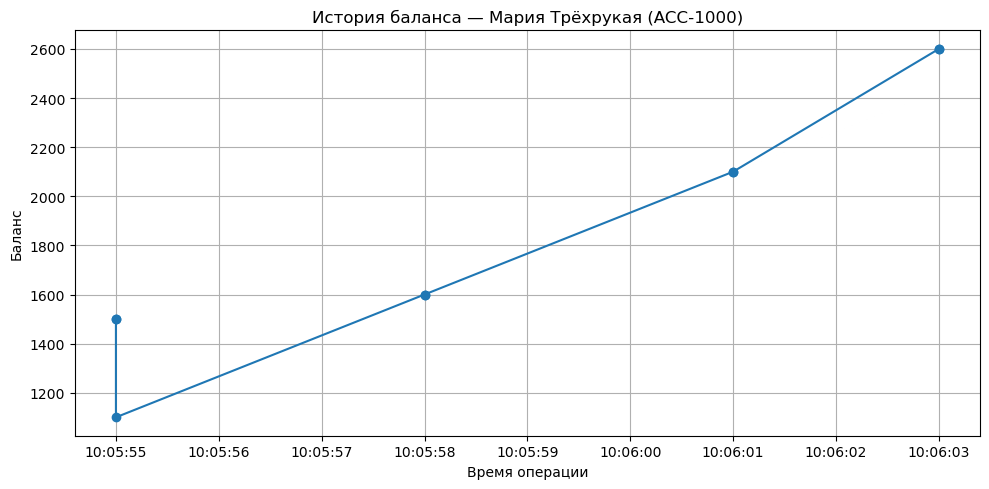

In [33]:
# --- Проверка работы метода ---
acc.plot_history()
# На графике вертикальная линия, т.к. при выполнении первого теста счет менялся практически в один момент времени. 
# Это не ошибка, так и должно быть

ЗАДАЧА 2 3

In [46]:
import json
# --- Расчётный счёт ---
class CheckingAccount(Account):
    account_type = "checking"

    def __init__(self, account_holder: str, balance: float = 0):
        super().__init__(account_holder, balance)
    
    def load_history(self, filepath: str):
        """Загрузка и очистка истории из CSV или JSON"""
        df = self._load_file(filepath)
        df_clean = self.clean_history(df)

        for _, row in df_clean.iterrows():
            if row["operation"] == "deposit":
                self._balance += row["amount"]
            elif row["operation"] == "withdraw":
                self._balance -= row["amount"]

            self.operations_history.append({
                "datetime": row["date"],
                "type": row["operation"],
                "amount": row["amount"],
                "balance": round(self._balance, 2),
                "status": row["status"]
            })

    def _load_file(self, filepath: str) -> pd.DataFrame:
        """Читает CSV или JSON"""
        if filepath.endswith(".csv"):
            df = pd.read_csv(filepath)
        elif filepath.endswith(".json"):
            with open(filepath, "r", encoding="utf-8") as f:
                data = json.load(f)
            df = pd.DataFrame(data)
        else:
            raise ValueError("Неподдерживаемый формат файла")
        return df

    def clean_history(self, df: pd.DataFrame) -> pd.DataFrame:
        """Очистка данных: убираем ошибки, опечатки, неверные даты"""
        df = df.copy()

        # фильтр по типу счёта
        df = df[df["account_type"] == self.account_type]

        # нормализуем операции
        df["operation"] = (
            df["operation"]
            .astype(str)
            .str.lower()
            .replace({"diposit": "deposit", "depo": "deposit", "witdraw": "withdraw"})
        )

        # оставляем только допустимые операции
        df = df[df["operation"].isin(["deposit", "withdraw"])]

        # чистим отрицательные или пустые суммы
        df = df[pd.to_numeric(df["amount"], errors="coerce") > 0]

        # убираем некорректные даты
        def try_parse_date(x):
            for fmt in ("%Y-%m-%d %H:%M:%S", "%d/%m/%Y %H:%M"):
                try:
                    return datetime.strptime(x, fmt)
                except Exception:
                    continue
            return None

        df["date"] = df["date"].astype(str).apply(try_parse_date)
        df = df.dropna(subset=["date"])

        # нормализуем статус
        df["status"] = df["status"].astype(str).apply(
            lambda x: "success" if "succ" in x.lower() else "fail"
        )

        # оставляем только успешные
        df = df[df["status"] == "success"]

        # сортировка по дате
        df = df.sort_values("date").reset_index(drop=True)
        return df


# --- Сберегательный счёт ---
class SavingsAccount(Account):
    account_type = "savings"

    def __init__(self, account_holder: str, balance: float = 0):
        super().__init__(account_holder, balance)

    def withdraw(self, amount: float):
        """Снимать можно не более 50% от текущего баланса."""
        if amount <= 0:
            self._add_operation("withdraw", amount, "fail")
            raise ValueError("Сумма снятия должна быть положительной.")

        if amount > self._balance * 0.5:
            self._add_operation("withdraw", amount, "fail")
            raise ValueError("Нельзя снять больше 50% от текущего баланса.")

        self._balance -= amount
        self._add_operation("withdraw", amount, "success")

    def apply_interest(self, rate: float):
        """Начислить проценты на текущий баланс."""
        if rate < 0:
            raise ValueError("Ставка не может быть отрицательной.")
        interest = self._balance * (rate / 100)
        self._balance += interest
        self._add_operation("interest", round(interest, 2), "success")

    def get_largest_operations(self, n: int = 3):
        """Вывести последние n крупных операций."""
        if not self.operations_history:
            print("История пуста.")
            return []
        # фильтруем только успешные операции
        sorted_ops = sorted(
            [op for op in self.operations_history if op["status"] == "success"],
            key=lambda x: x["amount"],
            reverse=True
        )
        result = sorted_ops[:n]
        for op in result:
            print(f"{op['datetime']} | {op['type']} | {op['amount']}₽ | Баланс: {op['balance']}₽")
        return result
    
    def load_history(self, filepath: str):
        df = self._load_file(filepath)
        df_clean = self.clean_history(df)

        for _, row in df_clean.iterrows():
            if row["operation"] == "deposit":
                self._balance += row["amount"]
            elif row["operation"] == "withdraw":
                self._balance -= row["amount"]
            elif row["operation"] == "interest":
                self._balance += row["amount"]

            self.operations_history.append({
                "datetime": row["date"],
                "type": row["operation"],
                "amount": row["amount"],
                "balance": round(self._balance, 2),
                "status": row["status"]
            })

    def _load_file(self, filepath: str) -> pd.DataFrame:
        if filepath.endswith(".csv"):
            df = pd.read_csv(filepath)
        elif filepath.endswith(".json"):
            with open(filepath, "r", encoding="utf-8") as f:
                data = json.load(f)
            df = pd.DataFrame(data)
        else:
            raise ValueError("Неподдерживаемый формат файла")
        return df

    def clean_history(self, df: pd.DataFrame) -> pd.DataFrame:
        df = df.copy()

        # фильтр по типу счёта
        df = df[df["account_type"] == self.account_type]

        # нормализуем операции
        df["operation"] = (
            df["operation"]
            .astype(str)
            .str.lower()
            .replace({
                "diposit": "deposit",
                "depo": "deposit",
                "witdraw": "withdraw"
            })
        )

        # только допустимые операции
        df = df[df["operation"].isin(["deposit", "withdraw", "interest"])]

        # положительные суммы
        df = df[pd.to_numeric(df["amount"], errors="coerce") > 0]

        # валидные даты
        def try_parse_date(x):
            for fmt in ("%Y-%m-%d %H:%M:%S", "%d/%m/%Y %H:%M"):
                try:
                    return datetime.strptime(x, fmt)
                except Exception:
                    continue
            return None

        df["date"] = df["date"].astype(str).apply(try_parse_date)
        df = df.dropna(subset=["date"])

        # статус
        df["status"] = df["status"].astype(str).apply(
            lambda x: "success" if "succ" in x.lower() else "fail"
        )

        df = df[df["status"] == "success"]

        df = df.sort_values("date").reset_index(drop=True)
        return df

    
if __name__ == "__main__":
    print("=== Проверка CheckingAccount ===")
    ca = CheckingAccount("Андрей Июльских", 1000)
    ca.deposit(300)
    ca.withdraw(200)
    print(ca.get_history())

    print("\n=== Проверка SavingsAccount ===")
    sa = SavingsAccount("Анастасия Мирная", 2000)
    sa.deposit(500)
    sa.withdraw(800) # OK (меньше 50%)
    try:
        sa.withdraw(2000) # Ошибка — больше 50%
    except ValueError as e:
        print("Ошибка:", e)
    sa.apply_interest(7)
    sa.get_largest_operations(3)
    print("\nИстория сберегательного счёта:")
    print(sa.get_history())

=== Проверка CheckingAccount ===
[2025-11-08 10:33:28] Deposit на 300₽ → баланс: 1300₽ (success)
[2025-11-08 10:33:28] Withdraw на 200₽ → баланс: 1100₽ (success)

=== Проверка SavingsAccount ===
Ошибка: Нельзя снять больше 50% от текущего баланса.
2025-11-08 10:33:28 | withdraw | 800₽ | Баланс: 1700₽
2025-11-08 10:33:28 | deposit | 500₽ | Баланс: 2500₽
2025-11-08 10:33:28 | interest | 119.0₽ | Баланс: 1819.0₽

История сберегательного счёта:
[2025-11-08 10:33:28] Deposit на 500₽ → баланс: 2500₽ (success)
[2025-11-08 10:33:28] Withdraw на 800₽ → баланс: 1700₽ (success)
[2025-11-08 10:33:28] Withdraw на 2000₽ → баланс: 1700₽ (fail)
[2025-11-08 10:33:28] Interest на 119.0₽ → баланс: 1819.0₽ (success)


In [47]:
# --- Проверка валидации ---
ca = CheckingAccount("Андрей Июльских Дней", 1000)

ValueError: Имя владельца должно быть в формате 'Имя Фамилия'.

ТЕСТИРОВАНИЕ

In [ ]:
import os
import pandas as pd
from pprint import pprint

# Список аккаунтов, которые есть в предоставленных файлах — взял из ваших данных в архиве
TEST_ACCOUNTS = [
    ("ACC-100001", "checking"),
    ("ACC-100002", "savings"),
    ("ACC-100003", "checking"),
    ("ACC-100004", "savings"),
]

CSV_PATH = "/Users/zhmikhail/Downloads/Файлы к ДЗ 5/transactions_dirty.csv"
JSON_PATH = "/Users/zhmikhail/Downloads/Файлы к ДЗ 5/transactions_dirty.json"

def info(msg):
    print("\n" + "-"*80)
    print(msg)
    print("-"*80)

def safe_load_df_via_instance(cls, filepath):
    """
    Вызов приватного _load_file класса экземпляра, если он есть.
    Возвращает DataFrame или None + сообщение об ошибке.
    """
    inst = cls("Дэнс Дэнсов", 0)
    # При тестировании будем временно назначать account_number чтоб совпало
    # но здесь не нужно.
    if not hasattr(inst, "_load_file"):
        raise RuntimeError(f"{cls.__name__} не содержит метод _load_file(filepath).")
    df = inst._load_file(filepath)
    return df

def run_check_for(account_number, account_type, csv_path=CSV_PATH, json_path=JSON_PATH):
    info(f"Проверка для {account_number} ({account_type})")

    # Создаём экземпляр соответствующего класса
    if account_type == "checking":
        acc = CheckingAccount("Тест Капдота", 0)
    else:
        acc = SavingsAccount("Тест Капдота", 0)

    # подменяем номер счёта, чтобы load_history фильтровал по нужному
    acc.account_number = account_number

    # Загружаем сырой CSV (используем _load_file экземпляра)
    try:
        df_csv = acc._load_file(csv_path)
        print(f"Всего строк в CSV: {len(pd.read_csv(csv_path))} (весь файл)")
    except Exception as e:
        print("Не удалось прочитать CSV через _load_file:", e)
        df_csv = None

    # Загружаем сырой JSON (через тот же _load_file — если поддерживается)
    try:
        df_json = acc._load_file(json_path)
    except Exception as e:
        print("Не удалось прочитать JSON через _load_file:", e)
        df_json = None

    # Объединяем оба DataFrame если оба прочитались
    dfs = []
    if isinstance(df_csv, pd.DataFrame):
        dfs.append(df_csv)
    if isinstance(df_json, pd.DataFrame):
        dfs.append(df_json)
    if not dfs:
        print("Ни один файл не загружен, прекращаю проверку для аккаунта.")
        return acc

    df_all = pd.concat(dfs, ignore_index=True, sort=False)

    # Сколько строк в файле соответствуют этому account_number/account_type?
    mask = (df_all["account_number"] == account_number) & (df_all["account_type"] == account_type)
    df_match = df_all[mask].copy()
    total_match = len(df_match)
    print(f"Найдено строк в файле для {account_number}: {total_match}")

    if total_match == 0:
        print("Нет строк — баста.")
        return acc

    # Сохраняем примеры проблемных строк (первые 5)
    print("\nПримеры строк из файла для этого счёта (первые x, где x = 5):")
    with pd.option_context('display.max_columns', None):
        print(df_match.head(5).to_string(index=False))

    # Вызываем clean_history у экземпляра
    try:
        df_clean = acc.clean_history(df_match)
        assert isinstance(df_clean, pd.DataFrame)
    except Exception as e:
        print("Ошибка при вызове clean_history():", e)
        return acc

    valid = len(df_clean)
    invalid = total_match - valid
    print(f"\nПосле clean_history(): валидных строк = {valid}, инвалидных = {invalid}")

    # Покажем первые/последние валидные строки
    if valid:
        print("\nПервые 5 валидных строк (после clean_history):")
        with pd.option_context('display.max_columns', None):
            print(df_clean.head(5).to_string(index=False))
        print("\nПоследние 5 валидных строк (после clean_history):")
        print(df_clean.tail(5).to_string(index=False))

    # Теперь вызовем load_history (он должен обновить баланс и записать операции)
    try:
        # Перед загрузкой — запомним баланс (я сам-то помню, этому балбесу нужны команды)
        balance_before = acc.get_balance()
        ops_before = len(acc.operations_history)
        print(f"\nБаланс до load_history: {balance_before:.2f}, операций в истории: {ops_before}")
        acc.load_history(csv_path) # вызов с CSV (метод внутри сам фильтрует по account_number)
        # Дополнительно загружаем JSON (это безопасно жи есть)
        acc.load_history(json_path)
        balance_after = acc.get_balance()
        ops_after = len(acc.operations_history)
        print(f"Баланс после load_history (CSV+JSON): {balance_after:.2f}, операций добавлено: {ops_after - ops_before}")
    except Exception as e:
        print("Ошибка при вызове load_history():", e)
        return acc

    # Печатаем итоговую историю (коротко)
    print("\nКраткая история операций (последние 10 записей):")
    hist = acc.operations_history[-10:]
    for op in hist:
        # если datetime в clean был строкой или datetime, обрабатываем
        dt = op.get("datetime")
        if hasattr(dt, "strftime"):
            dt_str = dt.strftime("%Y-%m-%d %H:%M:%S")
        else:
            dt_str = str(dt)
        print(f"{dt_str} | {op.get('type')} | amount={op.get('amount')} | balance={op.get('balance')} | status={op.get('status')}")

    # Если savings, вызовем get_largest_operations
    if isinstance(acc, SavingsAccount):
        print("\nТоп-3 крупных операций (get_largest_operations):")
        try:
            acc.get_largest_operations(3)
        except Exception as e:
            print("Ошибка в get_largest_operations:", e)

    return acc

def main():
    # Проверяем наличие файлов
    for p in (CSV_PATH, JSON_PATH):
        if not os.path.exists(p):
            print(f"Файл {p} не найден вообще нигде, ты чо, приболел? Лечись, браток")
            return

    results = {}
    for acct_num, acct_type in TEST_ACCOUNTS:
        acc = run_check_for(acct_num, acct_type, CSV_PATH, JSON_PATH)
        results[acct_num] = acc

    info("Итоговая сводка по всем аккаунтам")
    for acct_num, acc in results.items():
        print(f"{acct_num} -> баланс: {acc.get_balance():.2f}, операций в истории: {len(acc.operations_history)}")

    info("Проверка дополнительных правил (Savings withdrawal ограничение и apply_interest)")
    # Пример: попробуем снять >50% с сберсчёта ACC-100002 (если он есть)
    if "ACC-100002" in results:
        sa = results["ACC-100002"]
        try:
            print("Пробуем снять 999999 (ожидаем ошибку):")
            sa.withdraw(999999)
        except Exception as e:
            print("Ожидаемая ошибка при снятии >50%:", e)
        # Пробуем начислить процент
        try:
            bal_before = sa.get_balance()
            sa.apply_interest(7)
            print(f"Начислил 7%: баланс {bal_before:.2f} -> {sa.get_balance():.2f}")
        except Exception as e:
            print("Ошибка в apply_interest:", e)

if __name__ == "__main__":
    main()

# Если что, весь файл с выводом я положил рядом с файлом блокнота



--------------------------------------------------------------------------------
Проверка для ACC-100001 (checking)
--------------------------------------------------------------------------------
Всего строк в CSV: 105 (весь файл)
Найдено строк в файле для ACC-100001: 52

Примеры строк из файла для этого счёта (первые x, где x = 5):
account_number account_type                date operation  amount  balance_after  status
    ACC-100001     checking 2025-09-27 22:17:26   deposit   921.0         2121.0 success
    ACC-100001     checking 2025-09-27 22:17:26   deposit   607.0         2728.0 success
    ACC-100001     checking 2025-09-28 22:17:26   deposit   488.0         3216.0 success
    ACC-100001     checking    28/09/2025 22:17   deposit   129.0         3345.0 success
    ACC-100001     checking 2025-09-29 22:17:26   deposit   880.0         4225.0 success

После clean_history(): валидных строк = 40, инвалидных = 12

Первые 5 валидных строк (после clean_history):
account_number accou

In [ ]:
# В заключение данной работы попрошу обратить внимание на количество строк в файле для ACC-100001 (в выводе тестирования). 
# Хорошего дня!